- <a href='#0'>0. Introduction</a>  
- <a href='#1'>1. Get the Data</a>
- <a href='#2'>2. Check the Data</a>
- <a href='#3'> 3. Explore the data</a>
    - <a href='#3-1'>3.1 Categorical features</a>
    - <a href='#3-2'>3.2 Numerical features</a>
    - <a href='#3-3'>3.3 Categorical features by label</a>
    - <a href='#3-4'>3.4 Numerical features by label</a>
    - <a href='#3-5'>3.5 Correlation Matrix</a>
- <a href='#4'> 4. A further exploration on application table</a>
    - <a href='#4-1'>4.1 Impute missing values</a>
    - <a href='#4-2'>4.2 Create more feature</a>
    - <a href='#4-3'>4.3 Train model</a>
    - <a href='#4-4'>4.4 Feature importance</a>
    - <a href='#4-5'>4.5 Prediction</a>

## <a id='0'>0. Introduction</a>

 [Home Credit](http://www.homecredit.net) is an international non-bank financial institution founded in 1997 in the Czech Republic. The company operates in 14 countries and focuses on lending primarily to people with little or no credit history. 

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--**to predict their clients' repayment abilities.**

While Home Credit is currently using various statistical and machine learning methods to make these predictions, **they're challenging Kagglers to help them unlock the full potential of their data**. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.
![](http://www.homecredit.net/~/media/Images/H/Home-Credit-Group/image-gallery/full/image-gallery-01-11-2016-b.png)

> ## <a id='1'>1. Get the data</a>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()
import gc
import warnings
import time
warnings.filterwarnings("ignore")

/home/adrian/.conda/envs/kmapper/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/adrian/.conda/envs/kmapper/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/adrian/.conda/envs/kmapper/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
application_train = pd.read_csv('../input/application_train.csv.zip')
application_test= pd.read_csv('../input/application_test.csv.zip')
bureau = pd.read_csv('../input/bureau.csv.zip')
bureau_balance = pd.read_csv('../input/bureau_balance.csv.zip')
POS_CASH_balance = pd.read_csv('../input/POS_CASH_balance.csv.zip')
credit_card_balance = pd.read_csv('../input/credit_card_balance.csv.zip')
previous_application = pd.read_csv('../input/previous_application.csv.zip')
installments_payments = pd.read_csv('../input/installments_payments.csv.zip')

This file contains descriptions for the columns in the various data files.

<img src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" width="800"></img>

In [6]:
print('------------main------------')
print('application_train:', application_train.shape[0], "rows and", application_train.shape[1],'columns')
print('application_test:', application_test.shape[0], "rows and", application_test.shape[1],'columns')
print('      ')
print('------------others------------')
print('POS_CASH_balance:', POS_CASH_balance.shape[0], "rows and", POS_CASH_balance.shape[1],'columns')
print('bureau:', bureau.shape[0], "rows and", bureau.shape[1],'columns')
print('bureau_balance:', bureau_balance.shape[0], "rows and", bureau_balance.shape[1],'columns')
print('previous_application:', previous_application.shape[0], "rows and", previous_application.shape[1],'columns')
print('installments_payments:', installments_payments.shape[0], "rows and", installments_payments.shape[1],'columns')
print('credit_card_balance:', credit_card_balance.shape[0], "rows and", credit_card_balance.shape[1],'columns')

------------main------------
application_train: 307511 rows and 122 columns
application_test: 48744 rows and 121 columns
      
------------others------------
POS_CASH_balance: 10001358 rows and 8 columns
bureau: 1716428 rows and 17 columns
bureau_balance: 27299925 rows and 3 columns
previous_application: 1670214 rows and 37 columns


NameError: name 'installments_payments' is not defined

## <a id='2'>2. Check the data</a>
### 2.1 application train / test

In [7]:
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [8]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [9]:
def find_missing(data):
    # number of missing values
    count_missing = data.isnull().sum().values
    # total records
    total = data.shape[0]
    # percentage of missing
    ratio_missing = count_missing/total
    # return a dataframe to show: feature name, # of missing and % of missing
    return pd.DataFrame(data={'missing_count':count_missing, 'missing_ratio':ratio_missing}, index=data.columns.values)
find_missing(application_train).head(12)

missing_count  missing_ratio
SK_ID_CURR                      0       0.000000
TARGET                          0       0.000000
NAME_CONTRACT_TYPE              0       0.000000
CODE_GENDER                     0       0.000000
FLAG_OWN_CAR                    0       0.000000
FLAG_OWN_REALTY                 0       0.000000
CNT_CHILDREN                    0       0.000000
AMT_INCOME_TOTAL                0       0.000000
AMT_CREDIT                      0       0.000000
AMT_ANNUITY                    12       0.000039
AMT_GOODS_PRICE               278       0.000904
NAME_TYPE_SUITE              1292       0.004201

### 2.2 POS_CASH_balance

In [19]:
POS_CASH_balance.head()

In [20]:
POS_CASH_balance.columns.values

In [21]:
find_missing(POS_CASH_balance).head(12)

### 2.3 bureau

In [22]:
bureau.head()

In [23]:
bureau.columns.values

In [24]:
find_missing(bureau).head(12)

### 2.4 bureau_balance

In [25]:
bureau_balance.head()

In [26]:
bureau_balance.columns.values

In [27]:
find_missing(bureau_balance).head(12)

### 2.5 credit_card_balance

In [28]:
credit_card_balance.head()

In [29]:
credit_card_balance.columns.values

In [31]:
find_missing(credit_card_balance).head(12)

### 2.6 previous_application

In [32]:
previous_application.head()

In [33]:
previous_application.columns.values

In [34]:
find_missing(previous_application).head(12)

### 2.7 installments_payments

In [35]:
installments_payments.head()

In [36]:
installments_payments.columns.values

In [37]:
find_missing(installments_payments).head(12)

## <a id='3'>3. Explore the data</a>

### <a id='3-1'>3.1 Categorical features</a>
#### Label

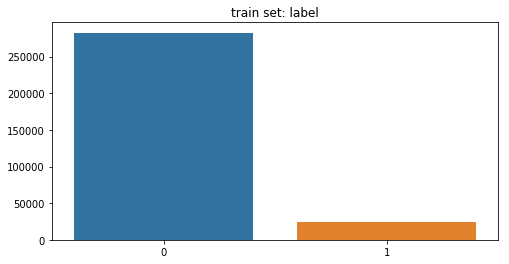

In [10]:
def plot_categorical(data, col, size=[8 ,4], xlabel_angle=0, title=''):
    '''use this for ploting the count of categorical features'''
    plotdata = data[col].value_counts()
    plt.figure(figsize = size)
    sns.barplot(x = plotdata.index, y=plotdata.values)
    plt.title(title)
    if xlabel_angle!=0: 
        plt.xticks(rotation=xlabel_angle)
    plt.show()
plot_categorical(data=application_train, col='TARGET', size=[8 ,4], xlabel_angle=0, title='train set: label')

### Occupation Type

In [18]:
plot_categorical(data=application_train, col='OCCUPATION_TYPE', size=[12 ,4], xlabel_angle=30, title='Occupation Type')

#### Gender

### Income Type

In [105]:
plot_categorical(data=application_train, col='NAME_INCOME_TYPE', size=[12 ,4], xlabel_angle=0, title='Income Type')

### House Type

In [104]:
plot_categorical(data=application_train, col='NAME_HOUSING_TYPE', size=[12 ,4], xlabel_angle=0, title='House Type')

### <a id='3-2'>3.2 Numerical features</a>
#### Credit Amount

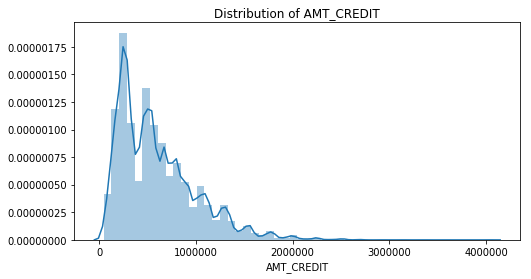

In [15]:
def plot_numerical(data, col, size=[8, 4], bins=50):
    '''use this for ploting the distribution of numercial features'''
    plt.figure(figsize=size)
    plt.title("Distribution of %s" % col)
    sns.distplot(data[col].dropna(), kde=True,bins=bins)
    plt.show()
plot_numerical(application_train, 'AMT_CREDIT')

#### Annuity Amount

In [135]:
plot_numerical(application_train, 'AMT_ANNUITY')

### Days employed

In [136]:
plot_numerical(application_train, 'DAYS_EMPLOYED')

### <a id='3-3'>3.3 Categorical features by label</a>
#### Gender

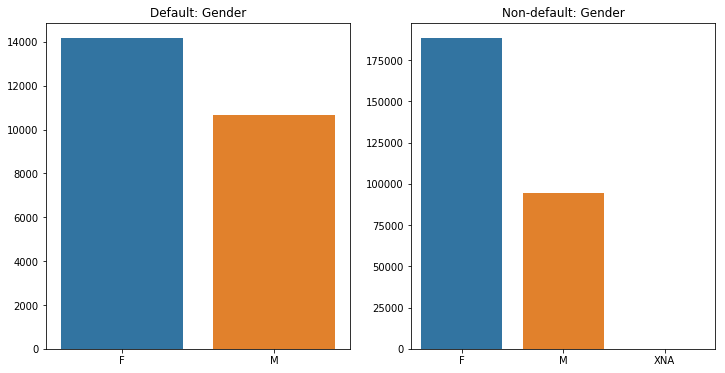

In [13]:
def plot_categorical_bylabel(data, col, size=[12 ,6], xlabel_angle=0, title=''):
    '''use it to compare the distribution between label 1 and label 0'''
    plt.figure(figsize = size)
    l1 = data.loc[data.TARGET==1, col].value_counts()
    l0 = data.loc[data.TARGET==0, col].value_counts()
    plt.subplot(1,2,1)
    sns.barplot(x = l1.index, y=l1.values)
    plt.title('Default: '+title)
    plt.xticks(rotation=xlabel_angle)
    plt.subplot(1,2,2)
    sns.barplot(x = l0.index, y=l0.values)
    plt.title('Non-default: '+title)
    plt.xticks(rotation=xlabel_angle)
    plt.show()
plot_categorical_bylabel(application_train, 'CODE_GENDER', title='Gender')

#### Education Type

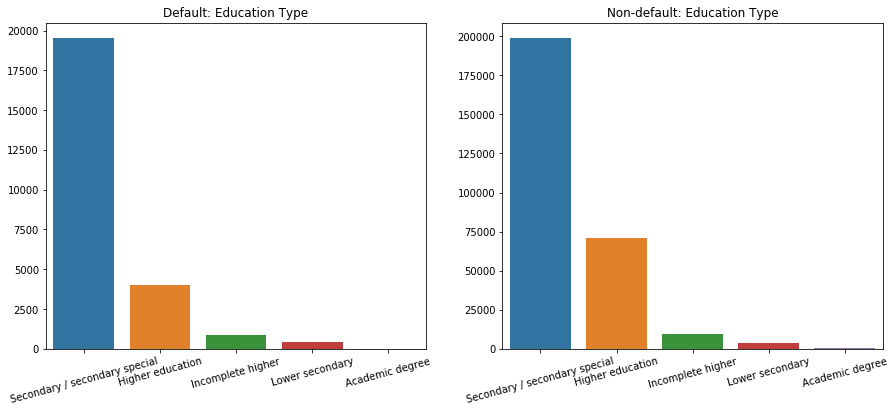

In [14]:
plot_categorical_bylabel(application_train, 'NAME_EDUCATION_TYPE', size=[15 ,6], xlabel_angle=15, title='Education Type')

### <a id='3-4'>3.4 Numerical features by label</a>
#### EXT_SOURCE_1

ValueError: array must not contain infs or NaNs

<Figure size 864x432 with 0 Axes>

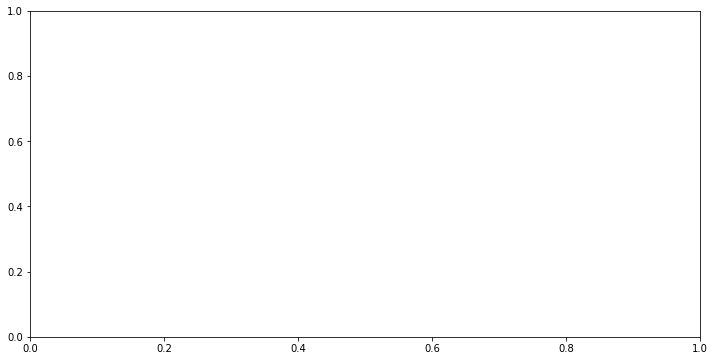

In [16]:
def plot_numerical_bylabel(data, col, size=[12, 6]):
    plt.figure(figsize=size)
    # Calculate the correlation coefficient between the new variable and the target
    corr = data['TARGET'].corr(data[col])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = data.ix[data['TARGET'] == 0, col].median()
    avg_not_repaid = data.ix[data['TARGET'] == 1, col].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(data.ix[data['TARGET'] == 0, col], label = 'TARGET == 0')
    sns.kdeplot(data.ix[data['TARGET'] == 1, col], label = 'TARGET == 1')
    
    # label the plot
    plt.xlabel(col); plt.ylabel('Density'); plt.title('%s Distribution' % col)
    plt.legend();
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (col, corr))
    # Print out average values
plot_numerical_bylabel(application_train, 'EXT_SOURCE_1')

#### EXT_SOURCE_2

In [23]:
plot_numerical_bylabel(application_train, 'EXT_SOURCE_2')

#### EXT_SOURCE_3

In [24]:
plot_numerical_bylabel(application_train, 'EXT_SOURCE_3')

 ### <a id='3-5'>3.5 Correlation Matrix</a>

In [25]:
corr_mat = application_train.corr()
plt.figure(figsize=[15, 15])
sns.heatmap(corr_mat.values, annot=False)
plt.show()

 ## <a id='4'>4 A further exploration on application table</a>
 ### <a id='4-1'>4.1 Impute missing values</a>

In [17]:
from sklearn.impute import SimpleImputer, MICEImputer
application_train = pd.read_csv('../input/application_train.csv')
application_test= pd.read_csv('../input/application_test.csv')

ModuleNotFoundError: No module named 'sklearn.impute'

### split categorical, discrete and numerical features

In [26]:
def feature_type_split(data, special_list=[]):
    cat_list = []
    dis_num_list = []
    num_list = []
    for i in data.columns.tolist():
        if data[i].dtype == 'object':
            cat_list.append(i)
        elif data[i].nunique() < 25:
            dis_num_list.append(i)
        elif i in special_list:     # if you want to add some special cases
            dis_num_list.append(i)
        else:
            num_list.append(i)
    return cat_list, dis_num_list, num_list
cat_list, dis_num_list, num_list = feature_type_split(application_train, special_list=['AMT_REQ_CREDIT_BUREAU_YEAR']) 

In [27]:
print(str(len(cat_list)),'categorical features:', cat_list)
print('-----------------------------------------')
print(str(len(dis_num_list)),'discrete numerical features:',dis_num_list)
print('-----------------------------------------')
print(str(len(num_list)),'continuous numerical features:',num_list)

### convert categorical using LabelEncoder

In [28]:
print(application_train.shape)
print(application_test.shape)

### impute missing values
- for categorical and discrete features: use **'mode'** in SimpleImputer
- for continuous features: use [MICEImputer](http://scikit-learn.org/dev/modules/generated/sklearn.impute.MICEImputer.html) with **median** as initial strategy 

In [199]:
# discrete
# start = time.time()
# application_train[cat_dummy_list] = SimpleImputer(strategy='most_frequent').fit_transform(application_train[cat_dummy_list])
# application_train[dis_num_list] = SimpleImputer(strategy='most_frequent').fit_transform(application_train[dis_num_list])
# application_test[cat_dummy_list]  = SimpleImputer(strategy='most_frequent').fit_transform(application_test[cat_dummy_list])
# application_test[dis_num_list]  = SimpleImputer(strategy='most_frequent').fit_transform(application_test[dis_num_list])
# end = time.time()
# print('discrete imputing time:', str(round((end - start)/60)), 'mins')
# # continuous 
# start = time.time()
# application_train[num_list] = MICEImputer(initial_strategy='median', n_imputations=50, n_nearest_features=20, verbose=True).fit_transform(application_train[num_list])
# application_test[num_list]  = MICEImputer(initial_strategy='median', n_imputations=50, n_nearest_features=20, verbose=True).fit_transform(application_test[num_list])
# end = time.time()
# print('continuous imputing time:', str(round((end - start)/60)), 'mins')

 ### <a id='4-2'>4.2 Create more features</a>

### Term: total credit / annuity

In [18]:
# some new features
application_train['TERM'] = application_train.AMT_CREDIT / application_train.AMT_ANNUITY
application_test['TERM'] = application_test.AMT_CREDIT / application_test.AMT_ANNUITY

### OVER_EXPECT_CREDIT: actual credit larger than goods price

In [19]:
application_train['OVER_EXPECT_CREDIT'] = (application_train.AMT_CREDIT > application_train.AMT_GOODS_PRICE).map({False:0, True:1})
application_test['OVER_EXPECT_CREDIT'] = (application_test.AMT_CREDIT > application_test.AMT_GOODS_PRICE).map({False:0, True:1})

### MEAN_BUILDING_SCORE_TOTAL: the sum of all building AVG score

In [20]:
application_train['MEAN_BUILDING_SCORE_AVG'] = application_train.iloc[:, 44:58].mean(skipna=True, axis=1)
application_train['TOTAL_BUILDING_SCORE_AVG'] = application_train.iloc[:, 44:58].sum(skipna=True, axis=1)
application_test['MEAN_BUILDING_SCORE_AVG'] = application_test.iloc[:, 44:58].mean(skipna=True, axis=1)
application_test['TOTAL_BUILDING_SCORE_AVG'] = application_test.iloc[:, 44:58].sum(skipna=True, axis=1)

### FLAG_DOCUMENT_TOTAL: the total number of provided document

In [21]:
application_train['FLAG_DOCUMENT_TOTAL'] = application_train.iloc[:, 96:116].sum(axis=1)
application_test['FLAG_DOCUMENT_TOTAL'] = application_test.iloc[:, 96:116].sum(axis=1)

### AMT_REQ_CREDIT_BUREAU_TOTAL: the total number of enquiries

In [22]:
application_train['AMT_REQ_CREDIT_BUREAU_TOTAL'] = application_train.iloc[:, 116:122].sum(axis=1)
application_test['AMT_REQ_CREDIT_BUREAU_TOTAL'] = application_test.iloc[:, 116:122].sum(axis=1)

### BIRTH_EMPLOTED_INTERVEL: the days between born and employed

In [23]:
application_train['BIRTH_EMPLOTED_INTERVEL'] = application_train.DAYS_EMPLOYED - application_train.DAYS_BIRTH
application_test['BIRTH_EMPLOTED_INTERVEL'] = application_test.DAYS_EMPLOYED - application_test.DAYS_BIRTH

In [24]:
application_train['BIRTH_REGISTRATION_INTERVEL'] = application_train.DAYS_REGISTRATION - application_train.DAYS_BIRTH
application_test['BIRTH_REGISTRATION_INTERVEL'] = application_test.DAYS_REGISTRATION - application_test.DAYS_BIRTH

In [25]:
application_train['MEAN_BUILDING_SCORE_AVG'] = application_train.iloc[:, 44:58].mean(skipna=True, axis=1)
application_train['TOTAL_BUILDING_SCORE_AVG'] = application_train.iloc[:, 44:58].sum(skipna=True, axis=1)
application_test['MEAN_BUILDING_SCORE_AVG'] = application_test.iloc[:, 44:58].mean(skipna=True, axis=1)
application_test['TOTAL_BUILDING_SCORE_AVG'] = application_test.iloc[:, 44:58].sum(skipna=True, axis=1)
application_train['INCOME_PER_FAMILY_MEMBER'] = application_train.AMT_INCOME_TOTAL / application_train.CNT_FAM_MEMBERS
application_test['INCOME_PER_FAMILY_MEMBER'] = application_test.AMT_INCOME_TOTAL / application_test.CNT_FAM_MEMBERS
application_train['SEASON_REMAINING'] = application_train.AMT_INCOME_TOTAL/4 -  application_train.AMT_ANNUITY
application_test['SEASON_REMAINING'] = application_test.AMT_INCOME_TOTAL/4 -  application_test.AMT_ANNUITY
application_train['RATIO_INCOME_GOODS'] = application_train.AMT_INCOME_TOTAL -  application_train.AMT_GOODS_PRICE
application_test['RATIO_INCOME_GOODS'] = application_test.AMT_INCOME_TOTAL -  application_test.AMT_GOODS_PRICE
application_train['CHILDREN_RATIO'] = application_train['CNT_CHILDREN'] / application_train['CNT_FAM_MEMBERS']
application_test['CHILDREN_RATIO'] = application_test['CNT_CHILDREN'] / application_test['CNT_FAM_MEMBERS']
# convert categorical variables to numericals
from sklearn.preprocessing import LabelEncoder
def label_encoder(input_df, encoder_dict=None):
    """ Process a dataframe into a form useable by LightGBM """
    # Label encode categoricals
    categorical_feats = input_df.columns[input_df.dtypes == 'object']
    for feat in categorical_feats:
        encoder = LabelEncoder()
        input_df[feat] = encoder.fit_transform(input_df[feat].fillna('NULL'))
    return input_df, categorical_feats.tolist(), encoder_dict
application_train, categorical_feats, encoder_dict = label_encoder(application_train)
application_test, categorical_feats, encoder_dict = label_encoder(application_test)

### <a id='4-3'>4.3 Train model</a>

**application**: 'binary' for binary classification

**num_iterations**: number of boosting iterations/trees, **n_estimators** in sklearn

**learning_rate**

**num_leaves**: number of leaves in one tree

**feature_fraction**: part of features used for each iteration

**bagging_fraction**: part of data used for each iteration

**lambda_l1/lambda_l2**: L1/L2 regularization

**min_split_gain**: the minimun gain to perform a split

**early_stopping_round**: if the validation metric can't improve for n rounds, stop iteration

**categorical_feature**: LightGBM API can deal with categorical feature automatically, **but we need transform string into integer**

In [26]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [27]:
X = application_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = application_train.TARGET
X_pred = application_test.drop(['SK_ID_CURR'], axis=1)

In [28]:
folds = StratifiedKFold(n_splits=5,random_state=6)
oof_preds = np.zeros(X.shape[0])
sub_preds = np.zeros(X_pred.shape[0])

In [29]:
start = time.time()
valid_score = 0
for n_fold, (trn_idx, val_idx) in enumerate(folds.split(X, y)):
    trn_x, trn_y = X.iloc[trn_idx], y[trn_idx]
    val_x, val_y = X.iloc[val_idx], y[val_idx]    
    
    train_data = lgb.Dataset(data=trn_x, label=trn_y, categorical_feature=categorical_feats)
    valid_data = lgb.Dataset(data=val_x, label=val_y)
    
    param = {'application':'binary','num_iterations':4000, 'learning_rate':0.05, 'num_leaves':24, 'feature_fraction':0.8, 'bagging_fraction':0.9,
             'lambda_l1':0.1, 'lambda_l2':0.1, 'min_split_gain':0.01, 'early_stopping_round':100, 'max_depth':7, 'min_child_weight':40, 'metric':'auc'}
    lgb_es_model = lgb.train(param, train_data, valid_sets=[train_data, valid_data], verbose_eval=100, categorical_feature=categorical_feats) 
    
    oof_preds[val_idx] = lgb_es_model.predict(val_x, num_iteration=lgb_es_model.best_iteration)
    sub_preds += lgb_es_model.predict(X_pred, num_iteration=lgb_es_model.best_iteration) / folds.n_splits
    print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(val_y, oof_preds[val_idx])))
    valid_score += roc_auc_score(val_y, oof_preds[val_idx])

print('valid score:', str(round(valid_score/folds.n_splits,4)))

end = time.time()
print('training time:', str(round((end - start)/60)), 'mins')

Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.777635	valid_1's auc: 0.760397
[200]	training's auc: 0.796092	valid_1's auc: 0.766378
[300]	training's auc: 0.808641	valid_1's auc: 0.767772
[400]	training's auc: 0.819204	valid_1's auc: 0.767759
Early stopping, best iteration is:
[356]	training's auc: 0.814713	valid_1's auc: 0.767985
Fold  1 AUC : 0.767986
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.777427	valid_1's auc: 0.76064
[200]	training's auc: 0.795374	valid_1's auc: 0.766836
[300]	training's auc: 0.807757	valid_1's auc: 0.768853
[400]	training's auc: 0.818313	valid_1's auc: 0.769882
[500]	training's auc: 0.827989	valid_1's auc: 0.77015
Early stopping, best iteration is:
[444]	training's auc: 0.82278	valid_1's auc: 0.770315
Fold  2 AUC : 0.770315
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.778524	valid_1's auc: 0.752649
[200]	training's auc: 0.79724	valid_1'

### <a id='4-4'>4.4 Feature importance</a>

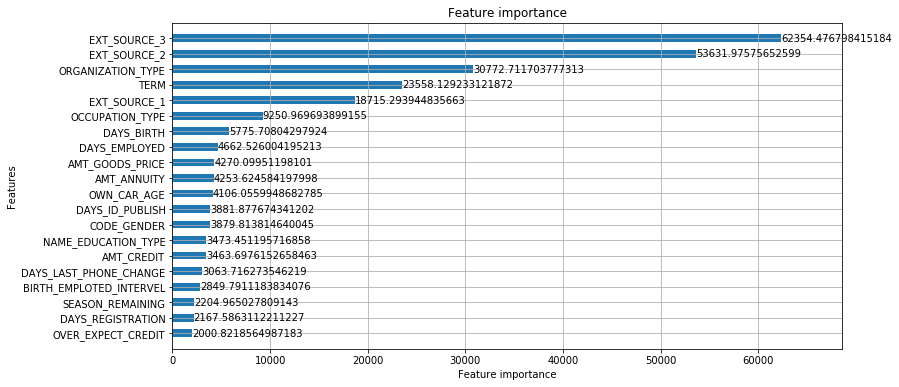

In [30]:
lgb.plot_importance(lgb_es_model, height=0.5, max_num_features=20, ignore_zero = False, figsize = (12,6), importance_type ='gain')

### <a id='4-5'>4.5 Prediction</a>

In [32]:
application_test= pd.read_csv('../input/application_test.csv.zip')
output = pd.DataFrame({'SK_ID_CURR':application_test.SK_ID_CURR, 'TARGET': sub_preds})
output.to_csv('only_application_pred.csv', index=False)